In [2]:
#import packages to get the dataset and EDA
get_ipython().system('pip install wordcloud')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#Get the dataset
train=pd.read_csv("/Users/xin/Desktop/project/quora-insincere-questions-classification/train.csv")
test=pd.read_csv("/Users/xin/Desktop/project/quora-insincere-questions-classification/test.csv")
sample=pd.read_csv("/Users/xin/Desktop/project/quora-insincere-questions-classification/sample_submission.csv")

#A glance at the basic inforamtion
train.info()
test.info()
sample.info()
train.head()
test.head()
sample.head()
train.columns

#more detailed information
train_sample = train.sample(n=10)
train_sample.question_text.head(n=10)

#Know the question type clearly
insincere=train[train.target==1]
sincere=train[train.target==0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1048575 non-null  object
 1   question_text  1048575 non-null  object
 2   target         1048575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   qid         375806 non-null  object
 1   prediction  375806 non-null  int64 
dtypes: int6

In [3]:
# EDA method1 #number and percentage of target sincere questions and insincere questions
target=train['target'].value_counts()
train_len = train.shape[0]
target0= len(train[train.target == 0])
target1= len(train[train.target == 1])
target0_pct= target0/train_len * 100
target1_pct = target1/train_len * 100
print(target)
print(f'The number of sincere questions is {target0}')
print(f'The number of sincere questions is {target1}')
print (f'The precentage of sincere questions is {target0_pct:.2f}%')
print (f'The precentage of insincere questions is {target1_pct:.2f}%')


0    983801
1     64774
Name: target, dtype: int64
The number of sincere questions is 983801
The number of sincere questions is 64774
The precentage of sincere questions is 93.82%
The precentage of insincere questions is 6.18%


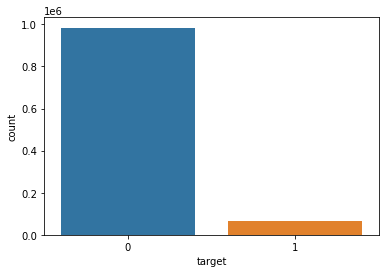

In [5]:
#EDA method2 Histgorams
#The percentage of target sincere questions and insincere questions
ax = sns.countplot(x=train['target'], data=train)

<ipython-input-4-59a8f89a6ddd>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(values, labels=labels,autopct='%1.2f%%')


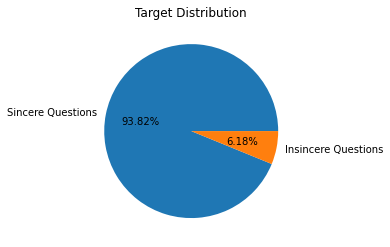

In [4]:
#EDA method3 the pie chart 
values = [[target0], [target1]]
labels = ["Sincere Questions", "Insincere Questions"]
plt.pie(values, labels=labels,autopct='%1.2f%%')
plt.title("Target Distribution")
plt.show()

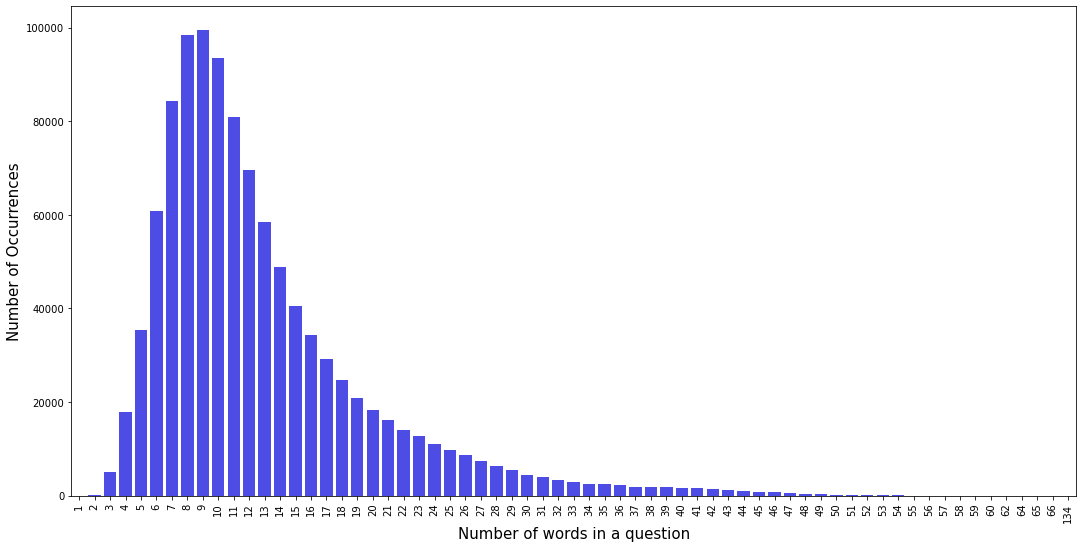

In [6]:
#EDA method4
#The question length and chart
train.question_text.str.split().str.len().describe()
#number of words o the question
train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))
#barchart
color = ('blue')
countwords = train["num_words"].value_counts()
plt.figure(figsize=(18,9))
sns.barplot(countwords.index,countwords.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Number of words in a question', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

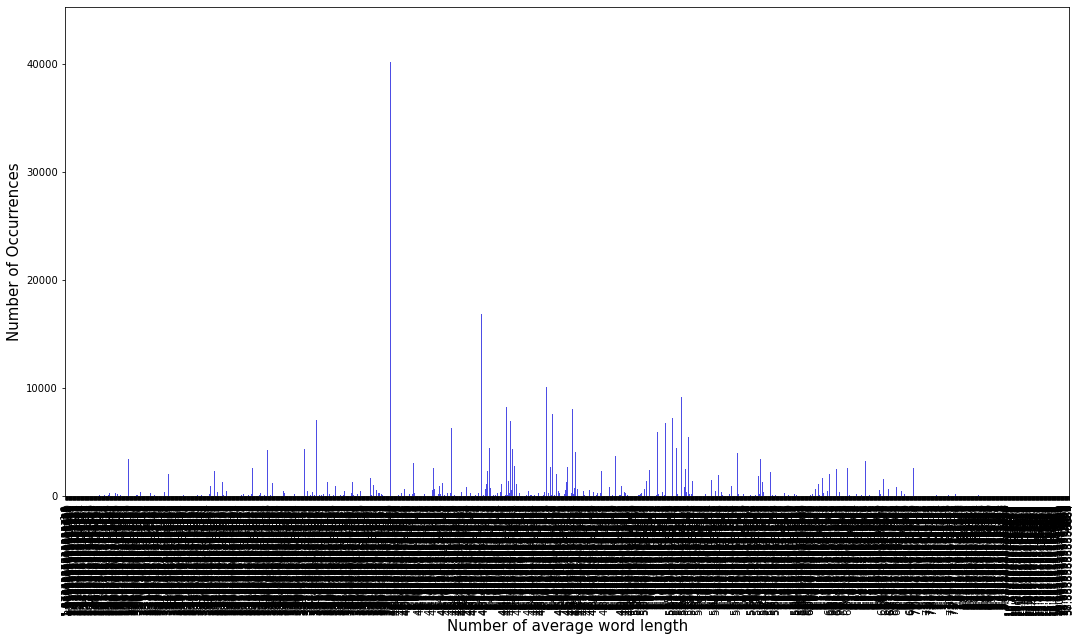

In [7]:
#EDA method5 Explore the word length
#I leraned how to count from this website https://stackoverflow.com/questions/61110908/how-can-i-use-lambda-to-count-the-number-of-words-in-a-file
# Average length of the words in the text 
train["mean_word_len"] = train["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#barchart
color=('blue')
countlen = train["mean_word_len"].value_counts()
plt.figure(figsize=(18,9))
sns.barplot(countlen.index, countlen.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Number of average word length', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

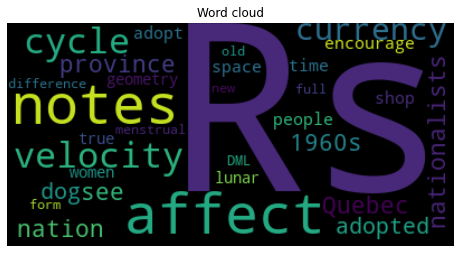

In [8]:
#EDA method6 fancy worldcloud 
#AI learned how to draw a wordcloud form https://www.datacamp.com/community/tutorials/wordcloud-python
wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="black").generate(str(train.question_text.values))
plt.figure(figsize = (8,8))
plt.title("Word cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

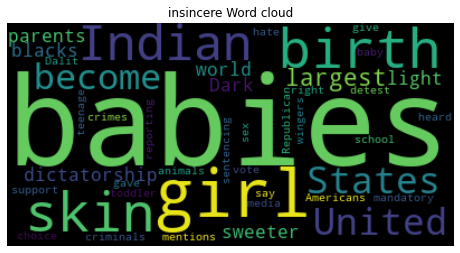

In [11]:
wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="black").generate(str(insincere.question_text.values))
plt.figure(figsize = (8,8))
plt.title("insincere Word cloud")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 75153822 words in the train dataset of question text.


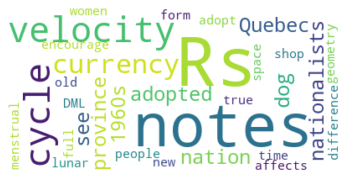

In [12]:
#EDA method6 Another way but similar wordcloud
text = " ".join(review for review in train.question_text)
print ("There are {} words in the train dataset of question text.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["affect", "now"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(train.question_text.values)) 
# Display the generated image(the matplotlib way)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#Model 1:Logistic Regression Model 
#The idea is from here https://zhuanlan.zhihu.com/p/36120960 
#when I just look though internet and nitice that it is a simple way to solve this problem without using any bmbeddings.
#import the packages
import re
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#Split the traindataset in to train and testdataset
traindata, testdata = train_test_split(train, test_size=0.7)

In [14]:
#Some question tests have common words in both sincere and insincere questions. So, I try to clean some common words. 
#I learn from https://machinelearningmastery.com/clean-text-machine-learning-python/ 
#and https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb
#https://gist.github.com/aaronkub/257a1bd9215da3a7221148600d849450
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(be)|(a)|(an)|(the)|(is)|(are)|(am)|(was)|(were)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|")
def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    return reviews
train_CLEAN = preprocess_reviews(traindata['question_text'])
test_CLEAN = preprocess_reviews(testdata['question_text'])

In [15]:
#Convert the questions to the martix of 0 and 1 for the model
Convert = CountVectorizer(binary=True)
Convert.fit(train)
X_train = Convert.transform(train_CLEAN)
X_test = Convert.transform(test_CLEAN)
#Use model fit to train a model and review the model to see the accuracy
T_traindata = traindata['target']
T_testdata = testdata['target']
#establish the model and train model
model_lg = LogisticRegression()
model_lg.fit(X_train, T_traindata)
#evaulate the model
accuracy_score(T_testdata, model_lg.predict(X_test))

0.9381255934921247

In [16]:
# use model predit to getd a final result
#I learn how to sace predictions to csv from 
#https://stackoverflow.com/questions/34864695/saving-prediction-results-to-csv
test_clean = preprocess_reviews(test['question_text'])
X_test = Convert.transform(test_clean)
Res = model_lg.predict(X_test)
Results_file = pd.DataFrame({"qid" : test['qid'], "prediction" : Res}).to_csv("Results_file.csv", index = None)

In [17]:
#model2
#I think that when people say something insincere or sincere, there are some common words have to use
#So it's a good way to make computer recognise the frequent use words and let them learn it's insincere
#The idea is from this
#The difficult situation comes, how to let the machine remrmber words, 
#I firstly think that it can remrember the combination of 26 words, which can be reflected by numbers, but this number array way may have some misunderstandings
#because there are 10 nunmbers and 26 letters, when I try to show letters, I have to choose two numbers for a letter, it's too complex
#Then after two days, I think that how must I represent the words in such a detailed way!
#I can just create a chart that use number to represent words not letters, and I can just choose the most frequent using words!
#I get idea about how to make a vocabulary for deep learning from
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
#https://www.educative.io/courses/natural-language-processing-ml/N0Wr9zwpEmv
#https://docs.python.org/3/library/tokenize.html

#import packages
get_ipython().system('pip install tqdm')
import warnings
from tqdm import tqdm
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import RNN, LSTM, Dropout, Flatten, Embedding, SpatialDropout1D, Dense, Dropout, Bidirectional
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,plot_confusion_matrix

In [18]:
#as the dataset is really big, when I train the data, it takes muchmore time, so I just select a mini part of data at this step
#and I plan to combine embedings with the dataset
trainmini = train.loc[:10000, :]
traindatam, testdatam = train_test_split(trainmini, test_size=0.3)
#some detailed information
train_sample = trainmini.sample(n=10)
train_sample.question_text.head(n=10)

4806    Why would a young girl call her female babysit...
9073    Why is the French-Caribbean music way more mel...
3382    What if I marry a girl who strongly believes i...
9613    What are some of the potential solutions to bu...
5981    What can you say about Persian intellectual in...
7077            How do I get back my interest in biology?
6684             Will modelling as a man get me anywhere?
915     If Britain revokes Article 50 now, would the v...
985     How can I learn making a stop motion whiteboar...
8345    Which is the best chemistry teacher in Patna f...
Name: question_text, dtype: object

In [19]:
# create a Vocabulary using the question_text
def get_vocab(train, num_words=10000):
    #get the dictionary using the data
    tokenizer = Tokenizer(num_words=num_words)
    texts = train.question_text.tolist()
    tokenizer.fit_on_texts([item.lower() for item in texts])
    return tokenizer
T = get_vocab(trainmini)

#check the results
print(T.texts_to_sequences(["I am the best"]))

[[8, 81, 1, 32]]


In [20]:
#I learn how to use embeddings form Kaggle notebooks
Emb_program = open('/Users/xin/Desktop/project/quora-insincere-questions-classification/embeddings/glove.840B.300d/glove.840B.300d.txt')
embeddings={}
for line in tqdm(Emb_program):
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings[word] = coefs
Emb_program.close()
print('Found %s word vectors.' % len(embeddings))

2196017it [02:24, 15249.51it/s]

Found 2196016 word vectors.


In [21]:
#onstruct a matrix in next step, 
#this matrix and the previously created dictionary T.word_index must be one-to-one correspondence, 
#and then use this matrix as the initialization of embedding
vocab_size = len(T.word_index.items())
# create a weight matrix for words in training docs
embedding_matrix = np.random.normal(loc=0, scale=1.0, size=(vocab_size+1, 300))
for word, i in T.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [22]:
#Use the serialization method sequence to realize the padding of the sentence
MAX_LENGTH = 28
train_X = np.array(pad_sequences(T.texts_to_sequences(traindatam.question_text.tolist()), maxlen=MAX_LENGTH, padding = 'post'))
valid_X = np.array(pad_sequences(T.texts_to_sequences(testdatam.question_text.tolist()), maxlen=MAX_LENGTH, padding = 'post'))
train_y, valid_y = np.array(traindatam.target.values), np.array(testdatam.target.values)

In [23]:
# define model by using keras
model2 = Sequential()
model2.add(Embedding(vocab_size+1, 300, input_length=MAX_LENGTH, weights=[embedding_matrix]))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 300)           4718100   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 28, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,891,557
Trainable params: 4,891,557
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Train model and model accuracy
model2.fit(train_X, train_y, epochs=2, verbose=1, batch_size=256)

Epoch 1/2
28/28 [==============================] - 5s 161ms/step - loss: 0.2899 - accuracy: 0.8996
Epoch 2/2
28/28 [==============================] - 5s 164ms/step - loss: 0.2335 - accuracy: 0.9351


In [25]:
#Prediction on test data
y_pred=model2.predict_classes(valid_X)
print(classification_report(valid_y,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2818
           1       0.00      0.00      0.00       183

    accuracy                           0.94      3001
   macro avg       0.47      0.50      0.48      3001
weighted avg       0.88      0.94      0.91      3001



/Users/xin/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#model3 the data that used in model3 is almost the same with model2, so I just use the dataset directly 
#https://www.kaggle.com/yogmoh/quora-insincere-nn

#create model
model3=Sequential()
model3.add(Embedding(vocab_size+1, 300, input_length=MAX_LENGTH, weights=[embedding_matrix]))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dropout(0.3))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 300)           4718100   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               320800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 5,039,101
Trainable params: 5,039,101
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
#Train model and model accuracy
model3.fit(train_X, train_y, epochs=2, verbose=1, batch_size=256)

Epoch 1/2
28/28 [==============================] - 5s 167ms/step - loss: 0.2533 - accuracy: 0.9246
Epoch 2/2
28/28 [==============================] - 5s 168ms/step - loss: 0.1819 - accuracy: 0.9377


In [28]:
#Prediction on test data
y_pred=model3.predict_classes(valid_X)
print(classification_report(valid_y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2818
           1       0.62      0.38      0.47       183

    accuracy                           0.95      3001
   macro avg       0.79      0.68      0.72      3001
weighted avg       0.94      0.95      0.94      3001

